<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [ ]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2022-01-01 01:20:50--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  12.5MB/s    in 2.7s    

2022-01-01 01:20:53 (12.5 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [6]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]
print(X[0])
print(np.shape(X))
print(np.shape(X[0]))

[  1   2   0 ...   2   3 236]
(4485, 1001)
(1001,)


Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, train_size=0.7)

Then a validation set from the train set:

In [ ]:
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.66, train_size=0.33)

Let's hyperparameter gridsearch over different values of `C`:

Training SVM with C=1.0
--> accuracy = 0.5067567567567568
[0.5067567567567568]
Training SVM with C=2.0
--> accuracy = 0.6058558558558559
[0.5067567567567568, 0.6058558558558559]
Training SVM with C=3.0
--> accuracy = 0.6441441441441441
[0.5067567567567568, 0.6058558558558559, 0.6441441441441441]
Training SVM with C=4.0
--> accuracy = 0.6576576576576577
[0.5067567567567568, 0.6058558558558559, 0.6441441441441441, 0.6576576576576577]
Training SVM with C=5.0
--> accuracy = 0.6801801801801802
[0.5067567567567568, 0.6058558558558559, 0.6441441441441441, 0.6576576576576577, 0.6801801801801802]
Training SVM with C=6.0
--> accuracy = 0.6891891891891891
[0.5067567567567568, 0.6058558558558559, 0.6441441441441441, 0.6576576576576577, 0.6801801801801802, 0.6891891891891891]
Training SVM with C=7.0
--> accuracy = 0.7027027027027027
[0.5067567567567568, 0.6058558558558559, 0.6441441441441441, 0.6576576576576577, 0.6801801801801802, 0.6891891891891891, 0.7027027027027027]
Training SVM with C=8.0
-->

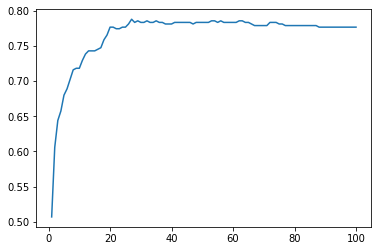

In [ ]:
C_values = np.linspace(1, 100, 100)
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')

  clf = SVC(C=c, kernel='rbf')
  
  # Fit on sub-train set
  clf.fit(X_train, y_train)

  # Evaluate on val set
  pred = clf.predict(X_validation)
  acc = accuracy_score(y_validation, pred, normalize=True, sample_weight=None)
  accuracies.append(acc)

  print(f'--> accuracy = {acc}')
  print(accuracies)

plt.plot(C_values, accuracies)
plt.show()

In [ ]:
bestc = accuracies.index(max(accuracies))
clf = make_pipeline(StandardScaler(), SVC(C=bestc, kernel='rbf'))
clf.fit(X_train, y_train)
predf = clf.predict(X_test)
accr = accuracy_score(y_test, predf, normalize=True, sample_weight=None)
print(acc)

In [ ]:
n = 100
C_values = [np.linspace(50, 150, n), np.linspace(1, 1000, n), np.linspace(1, 1000, n), np.linspace(1, 1000, n)]
Kernels = [('rbf', 0), ('poly', 1), ('poly', 2), ('poly', 3)]
Accuracies = np.zeros((len(Kernels), n))
degree = 0
i, j = 0, 0

for elmt in Kernels:

  j = 0
  kernel = elmt[0]
  degree = elmt[1]

  for c in C_values[i]:
    print(f'Training SVM with C={c}')

    clf = SVC(C=c, kernel=kernel, degree=degree)
    
    # Fit on sub-train set
    clf.fit(X_train, y_train)

    # Evaluate on val set
    pred = clf.predict(X_validation)

    acc = accuracy_score(y_validation, pred, normalize=True, sample_weight=None)
    Accuracies[i,j] = acc
    print(f'--> accuracy = {acc}')


    j += 1
  i += 1


Training SVM with C=50.0
--> accuracy = 0.6891891891891891
Training SVM with C=51.01010101010101
--> accuracy = 0.6891891891891891
Training SVM with C=52.02020202020202
--> accuracy = 0.6891891891891891
Training SVM with C=53.03030303030303
--> accuracy = 0.6891891891891891
Training SVM with C=54.04040404040404
--> accuracy = 0.6959459459459459
Training SVM with C=55.05050505050505
--> accuracy = 0.6959459459459459
Training SVM with C=56.06060606060606
--> accuracy = 0.6959459459459459
Training SVM with C=57.07070707070707
--> accuracy = 0.6959459459459459
Training SVM with C=58.08080808080808
--> accuracy = 0.6959459459459459
Training SVM with C=59.09090909090909
--> accuracy = 0.6959459459459459
Training SVM with C=60.101010101010104
--> accuracy = 0.6959459459459459
Training SVM with C=61.111111111111114
--> accuracy = 0.6981981981981982
Training SVM with C=62.121212121212125
--> accuracy = 0.6981981981981982
Training SVM with C=63.131313131313135
--> accuracy = 0.6981981981981982
T

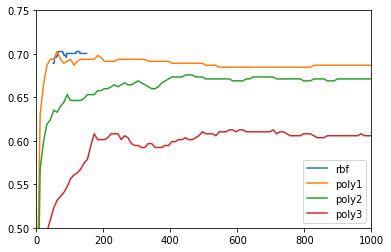

In [ ]:
Labels = ['rbf', 'poly1', 'poly2', 'poly3']

for k in range(len(Kernels)):
  plt.plot(C_values[k], Accuracies[k, :].tolist(), label = Labels[k])

plt.legend(loc='best')
plt.axis([0, 1000, 0.5, 0.75])
plt.show()

In [ ]:
Bestc = []
for k in range(len(Kernels)):
  Acc = Accuracies[k,:].tolist()
  Bestc.append(Acc.index(max(Acc)))

Accuracies_f = []
for c in range(len(Bestc)):
  clf = make_pipeline(StandardScaler(), SVC(C=Bestc[c], kernel=Kernels[c][0], degree=Kernels[c][1]))
  clf.fit(X_train, y_train)
  predf = clf.predict(X_test)
  acc = accuracy_score(y_test, predf, normalize=True, sample_weight=None)
  Accuracies_f.append(acc)

print(Kernels )
print(Accuracies_f)


NameError: ignored

Do the same with different kernel values, and different decision functions:

In [ ]:
"""
Cs = np.linspace(1,100,10).tolist()
Degrees = [1, 2, 3, 4]
Kernels = ['linear', 'rbf', 'poly']

X_t, y_t = X_train + X_val, y_train + y_val 
param_grid= {'kernel': Kernels, 'C': Cs, 'degree': Degrees, 'decision_function_shape': ('ovr', 'ovo')}
clf = SVC(gamma='scale')
sh = HalvingGridSearchCV(clf, param_grid, cv=5, factor=2, min_resources='exhaust').fit(X_t, y_t)
"""

NameError: ignored

In [ ]:
"""
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.DataFrame(sh.cv_results_)
df = df.sort_values('mean_test_score')
print(df[['param_C', 'param_decision_function_shape', 'param_degree', 'param_kernel', 'mean_test_score', 'rank_test_score']])
print(sh.best_params_)

# Make the predictions
y_pred = sh.predict(X_validation)
acc = accuracy_score(y_validation, y_pred, normalize=True, sample_weight=None)
print(acc)
"""

  param_C param_decision_function_shape param_degree param_kernel  mean_test_score  rank_test_score
1      27                           ovo            4         poly         0.481999               10
6      98                           ovo            3         poly         0.577891                9
5      12                           ovo            2         poly         0.636826                8
4      14                           ovr            2         poly         0.640647                7
2      27                           ovo            3       linear         0.708824                5
8      81                           ovo            4       linear         0.708824                5
9      37                           ovr            1         poly         0.720606                4
0      72                           ovr            4          rbf         0.729214                2
3      70                           ovr            2          rbf         0.729214                2


In [ ]:
"""
kernel = sh.best_params_.get('kernel')
degree = sh.best_params_.get('degree')
dfs = sh.best_params_.get('decision_function_shape')
C = sh.best_params_.get('C')

clf = make_pipeline(StandardScaler(), SVC(kernel=kernel, degree=degree, decision_function_shape=dfs, C=C))
clf.fit(X_train, y_train)
predf = clf.predict(X_test)
acc = accuracy_score(y_test, predf, normalize=True, sample_weight=None)
print(acc)
"""

0.766029246344207


In [ ]:
Cs = np.linspace(1,100,100).tolist()
Degrees = [1, 2, 3, 4]
Kernels = ['linear', 'rbf', 'poly']
param_grid= {'kernel': Kernels, 'C': Cs, 'degree': Degrees, 'decision_function_shape': ('ovr', 'ovo')}

# Find the Hyperparameters
X_t, y_t = np.concatenate((X_train, X_validation), axis=0), np.concatenate((y_train, y_validation), axis=0)
clf = SVC(gamma='scale')
sh = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=100).fit(X_t, y_t)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.DataFrame(sh.cv_results_)
df = df.sort_values('mean_test_score')
print(df[['param_C', 'param_decision_function_shape', 'param_degree', 'param_kernel', 'mean_test_score', 'rank_test_score']])
print(sh.best_params_)

# Make the predictions
y_pred = sh.predict(X_validation)
acc = accuracy_score(y_validation, y_pred, normalize=True, sample_weight=None)
print(acc)

   param_C param_decision_function_shape param_degree param_kernel  mean_test_score  rank_test_score
77      18                           ovo            4         poly         0.464796              100
63      23                           ovr            4         poly         0.474989               99
2        6                           ovo            3         poly         0.477856               98
28      36                           ovo            4         poly         0.487734               97
75      43                           ovo            4         poly         0.488052               96
70      60                           ovo            4         poly         0.496971               95
89       1                           ovo            1          rbf         0.499200               94
30      76                           ovr            4         poly         0.506526               93
33      74                           ovr            4         poly         0.506844        

In [ ]:
kernel = sh.best_params_.get('kernel')
degree = sh.best_params_.get('degree')
dfs = sh.best_params_.get('decision_function_shape')
C = sh.best_params_.get('C')

y_pred = sh.predict(X_test)
acc = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(acc)

0.7457817772778402
